# Chirp generator for "chirp" project

May 27, 2018

Reference: https://dzone.com/articles/sound-synthesis-numpy

In [17]:
%matplotlib inline

from numpy import linspace, sin, pi, int16, append
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

In [18]:
SAMPLING_RATE = 48000  # Hz
TQ = 0.02  # Time quantum in sec
SEGMENT = TQ * 4  # TQ * N, N >=4
AMPLITUDE = 20000

## Tone synthesis

In [19]:
def chirp(f1, f2, length, amp=1, rate=SAMPLING_RATE):
    t = linspace(0, length, int(length * rate))
    delta = float(f2 - f1)/float(length)
    freq = f1 + delta * t
    data = sin(2 * pi * freq * t) * amp
    return data.astype(int16) # two byte integers

In [23]:
F1 = 18000
F2 = 20000

def tq_1():
    return chirp(F1, F2, TQ, amp=AMPLITUDE)
def tq_0():
    return chirp(0, 0, TQ, amp=AMPLITUDE)

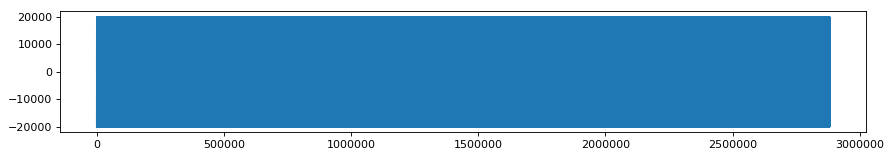

In [24]:
tone = tq_1()
for i in range(3000):  # approx. 1 min length
    tone = append(tone, tq_1())
    
plt.figure(figsize=(13, 2), dpi=80)
plt.plot(tone)

In [25]:
WAV_FILE = 'ChirpConstantSignal_18000_20000.wav'
write(WAV_FILE, SAMPLING_RATE, tone)